## Statistical Inference About Means and Proportions with Two Populations
In previous sessions we learnt how to develop interval estimates and conduct hypothesis tests for situations involving a single population mean. We continue our discussion of statistical inference by showing how interval estimates and hypothesis tests can be developed for situations involving two populations when the dif- ference between the two population means or the two population proportions is of prime im- portance.

### Objectives

- Type I - Type II errors

- Comparing population means in the case population variances are known

- Comparing population means in the case population variances are not known

### Inferences About the Difference Between Two Population Means: $\sigma_{1}$ and $\sigma_{2}$ Known

__Scenerio__

Suppose we noticed that Flatiron DC datascience graduates find a lot quicker jobs than in NYC campus. Adam Enbar believes that this is because DC student's number of years spent in education is higher than the NYC campus. Suppose we are asked to investigate this situation to find out whether there is any statistically significant difference between the mean number of years spent for education of the studens from two campuses. 

$\mu_{1} $ = mean population 1. (the mean # of years among all the DC datascience students.)

$\mu_{2} $ = mean population 2. (The mean # of years among all the NYC datascience students.)

$\bar{x}_{1}$ = sample mean number of years of education for the $n_1$ DC campus students. 

$\bar{x}_{2}$ = sample mean number of years of education for the $n_{2}$ NYC campus students.

$ \bar{x}_{1} - \bar{x}_{2}$ is called point estimator of the difference between two population.


One can show that the standard error for the $\bar{x}_{1} - \bar{x}_{2}$ is 

$$ \sigma_{\bar{x}_{1} - \bar{x}_{2}} = \sqrt{\frac{\sigma_{1}^{2}}{n_{1}} + \frac{\sigma_{2}^{2}}{n_{2}}}$$


> Recall that the standard error is just the standard deviation of the sampling distribution of $\bar{x}_{1} - \bar{x}_{2}$

If we want to find an interval estimates, then

$$\text{Interval Estimates} = (\bar{x}_{1} - \bar{x}_{2}) \pm \text{Margin of Error} $$

where margin of error is 

$$ \text{Margin of Error} = z_{\alpha/2}\sigma_{\bar{x}_{1} - \bar{x}_{2}}$$

## Form Null and Alternative Hypothesis
|

|  your work is here -  take $\alpha = 0.05$

|$H_{0}$ There is no difference between two population means 

$H_{0}:$ $\mu_{1} = \mu_{2} \iff \mu_{1} - \mu_{2} = 0$

$H_{a}$: $\mu_{1} \neq \mu_{2}$

In [8]:
import numpy as np

from scipy import stats
np.random.seed(2020)

In [9]:
rvs = stats.norm.rvs(loc=5, scale=2, size=10)# cehck with statas 
random = np.random.normal(loc=5, scale=2, size=10)
print(rvs)
print(random)

[1.46230859 5.15110454 2.73874059 3.69713967 3.21376875 2.45179805
 4.87769114 5.12902769 5.8202259  3.85423502]
[3.39733275 7.62407038 7.54939775 2.57128479 5.62743881 2.11035717
 4.2620774  3.46154685 5.78523221 5.11458767]


In [5]:
stats.norm.ppf(q=0.975)

1.959963984540054

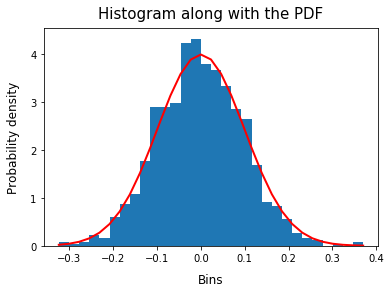

In [26]:
# Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title('Histogram along with the PDF', loc='center', pad=10, fontdict={'fontsize':15})
plt.xlabel('Bins', fontdict={'fontsize':12}, labelpad=10 )
plt.ylabel('Probability density', fontdict={'fontsize':12}, labelpad=10 )
plt.show()

In [27]:
np.random.seed(2020)

## Note that here we assumed that the populations are normally distributed
## What would happen if this wouldn't be the case?
nyc_campus = np.random.normal(loc = 4, scale = 4, size = 13)
dc_campus = np.random.normal(loc = 6, scale = 2, size = 17)

x1_bar = dc_campus.mean()
x2_bar = nyc_campus.mean()
n1 = len(dc_campus)
n2 = len(nyc_campus)
sigma1 = 2 # dc_campus.std()
sigma2 = 4  # nyc_campus.std()

std_error = np.sqrt(sigma1**2 / (n1) + sigma2**2 / (n2)) 


# ## where 1.96 come from? Hint: what is z_{alpha/2} for alpha = 0.05?
margin_error = std_error * 1.96

lower_bound = (x1_bar - x2_bar) - margin_error
upper_bound = (x1_bar - x2_bar) + margin_error


# ## How can we interpret this interval?

print('interval estimate for the differences of the means is [{}, {}]'.format(lower_bound, upper_bound))

In [34]:
stats.norm.ppf(0.975)

1.959963984540054

In [32]:
dc_campus.std()

1.8653960290176819

> **The above interval will contain a true mean at 95% of the times**

Note that instead of an estimation interval we could also find a z-statistic. Recall that the z-score is given by:

$$  z = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}} + \frac{\sigma_{2}^{2}}{n_{2}}}} $$

In [33]:
## Let's calculate the z-score with null hypothesis D_0 = 0 

z = (x1_bar - x2_bar) / std_error

print('z-statistics is {}'.format(z))

z_pdf = stats.norm.pdf(3.051)

print('corresponding probability density is {}'.format(z_pdf))

z_cdf = stats.norm.cdf(z)

print('Probability of getting z smaller than {} is {}'.format(z, z_cdf))

p_value = 1 - z_cdf

print('Probability of getting such z-value or higher by just chance is {}'.format(p_value))

z-statistics is 2.25047364585234
corresponding probability density is 0.0037981581268968865
Probability of getting z smaller than 2.25047364585234 is 0.9877905526911385
Probability of getting such z-value or higher by just chance is 0.012209447308861532


## Inferences about the difference between two population means to the case when the two population standard deviations, $\sigma_{1}$ and $\sigma_{2}$, are unknown.

Note tha most of the time the population variances are not known. Then we can use the sample standard deviations instead of population variances. Then we will use T-distributions in our estimations.

__Interval Estimates__

$$ \text{Interval Estimates} = (\bar{x}_{1} - \bar{x}_{2}) \pm t_{\alpha/2} \sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}} $$


In fact, this test is called the Welch test and here the use of T-distribution is an approximation. This test is preferred here because it doesn't assume that population's variance is the same and this test is relatively simpler. The only challenge here is to estimate the degrees of freedom for the T-distribution. But it is known that the formula 

$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$

Then T-statistics is given by 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} $$ and the degrees of freedom for $t$ is given as above.


In [108]:
## Let's calculate this for the example above:

s1_squared = dc_campus.var(ddof = 1)
s2_squared = nyc_campus.var(ddof = 1)

sn1 = s1_squared/n1

sn2 = s2_squared/n2

df_num = (sn1 + sn2)**2

df_denom = (sn1)**2 / (n1-1) + (sn2)**2 / (n2-1)

df = df_num/df_denom

print('approximate degrees of freedom is {}'.format(df))


approximate degrees of freedom is 16.817204189149287


In [109]:
## find t-statistics

t = (x1_bar - x2_bar)/ np.sqrt(sn1 + sn2)

print('t-statistics is found as {}'.format(t))

p_value = stats.t.sf(t, df = df)*2

print('p_value from cdf {}'.format(p_value))
stats.ttest_ind(dc_campus, nyc_campus, equal_var= False)

t-statistics is found as 2.3941130363637915
p_value from cdf 0.028601412116788048


Ttest_indResult(statistic=2.3941130363637915, pvalue=0.028601412116788048)